# Машиналық Оқыту: 0-ден бастап толыққанды жоба

Біз **"Медициналық сақтандыру құнын болжау" (Medical Cost Personal Dataset)** деректер жиынтығын қолданамыз.

Бұл ноутбукте біз нақты деректермен жұмыс істейтін Машиналық оқыту (Machine Learning) жобасын басынан аяғына дейін жасаймыз. Біздің мақсатымыз – адамның жасына, жынысына, салмақ индексіне және басқа да параметрлеріне қарап, оның **медициналық сақтандыру құнын (insurance charges)** болжау.

**Жобаның кезеңдері:**

1. **Кітапханаларды жүктеу:** Қажетті құралдарды дайындау.
2. **Деректерді жинау:** GitHub репозиторийінен тікелей жүктеу.
3. **EDA (Exploratory Data Analysis):** Деректерді зерттеу, визуализация және тазарту.
4. **Feature Engineering:** Деректерді модельге дайындау (Encoding, Scaling).
5. **Модельдеу:** Бірнеше алгоритмді (Linear Regression, Random Forest) қолданып көру.
6. **Бағалау және Оңтайландыру:** Нәтижені тексеру және гиперпараметрлерді таңдау.
7. **Қорытынды:** Модельді сақтау және нәтижені талқылау.


In [ ]:
# Негізгі кітапханалар
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Модельдеуге қажетті Scikit-Learn модульдері
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Ескерту хабарламаларын өшіру (код таза көрінуі үшін)
import warnings
warnings.filterwarnings('ignore')

# Графиктердің стилін баптау
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## 1-қадам: Деректерді жүктеу

Біз деректерді `raw.githubusercontent.com` арқылы тікелей интернеттен оқимыз. Бұл файлда АҚШ тұрғындарының медициналық шығындары туралы ақпарат бар.


In [ ]:
# GitHub-тан деректерді тікелей жүктеу URL-і
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"

# CSV файлды оқу
df = pd.read_csv(url)

# Деректердің алғашқы 5 жолын шығару
print("Деректердің алғашқы 5 жолы:")
display(df.head())

# Деректер жиынтығының өлшемі
print(f"\nДеректер өлшемі (жолдар, бағаналар): {df.shape}")

Деректердің алғашқы 5 жолы:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Деректер өлшемі (жолдар, бағаналар): (1338, 7)


## 2-қадам: Деректерді барлау (EDA)

Модель құрмас бұрын, деректердің табиғатын түсінуіміз керек.

* Деректерде бос мәндер (null) бар ма?
* Бағаналардың типтері қандай (сандық немесе мәтіндік)?
* Қандай параметрлер бағаға ең қатты әсер етеді?


In [ ]:
# Деректер туралы жалпы ақпарат алу
print("Деректер типтері және бос мәндер:")
df.info()

# Сандық бағаналардың статистикалық сипаттамасы
print("\nСтатистикалық сипаттама:")
display(df.describe())

# Бос мәндер бар-жоғын тексеру
print("\nБос мәндер саны:")
print(df.isnull().sum())

Деректер типтері және бос мәндер:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Статистикалық сипаттама:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Бос мәндер саны:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Мақсатты айнымалыны талдау (Charges)

Біз болжағымыз келетін `charges` (шығындар) бағанасы қалай таралғанын көрейік.


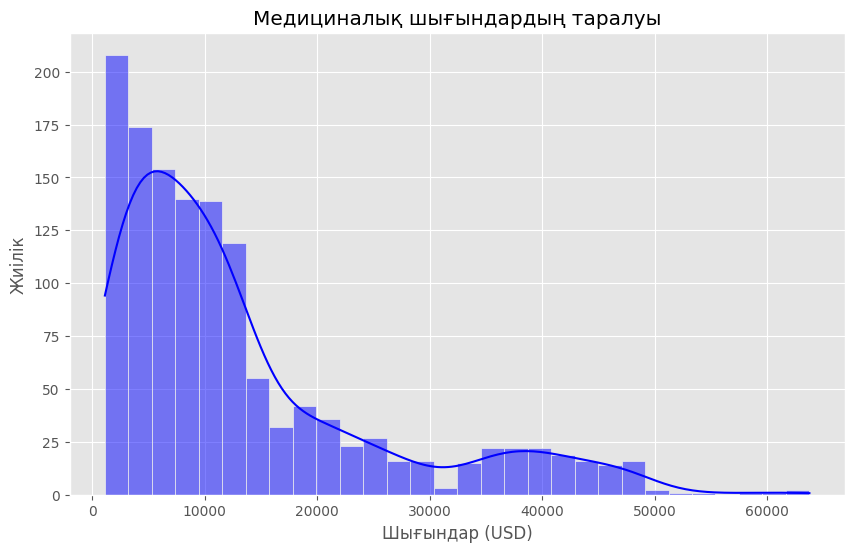

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Медициналық шығындардың таралуы')
plt.xlabel('Шығындар (USD)')
plt.ylabel('Жиілік')
plt.show()

### Корреляция матрицасы

Айнымалылардың бір-бірімен байланысын тексерейік. Әсіресе, темекі шегу (smoker) мен шығындардың арасында байланыс бар ма?

*Ескерту: Корреляцияны есептеу үшін мәтіндік деректерді уақытша цифрлық форматқа айналдырамыз.*

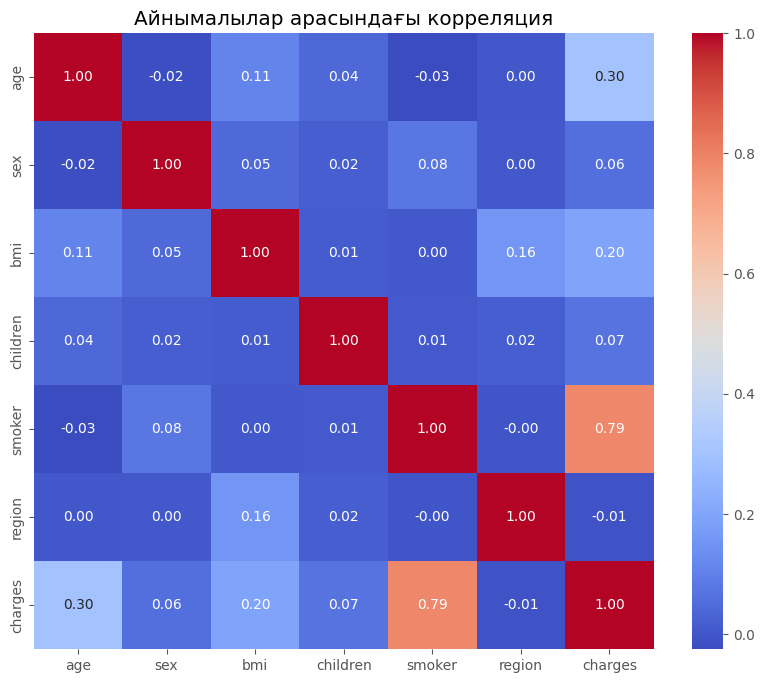

In [ ]:
# Корреляция үшін көшірме жасау және категориялық деректерді кодтау
df_corr = df.copy()
df_corr['sex'] = df_corr['sex'].apply(lambda x: 1 if x == 'male' else 0)
df_corr['smoker'] = df_corr['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df_corr['region'] = df_corr['region'].astype('category').cat.codes

# Корреляция матрицасын құру
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Айнымалылар арасындағы корреляция')
plt.show()

Графиктен көргеніміздей, `smoker` (шылым шегуші) мен `charges` арасында өте күшті байланыс бар. Оны егжей-тегжейлі қарастырайық.

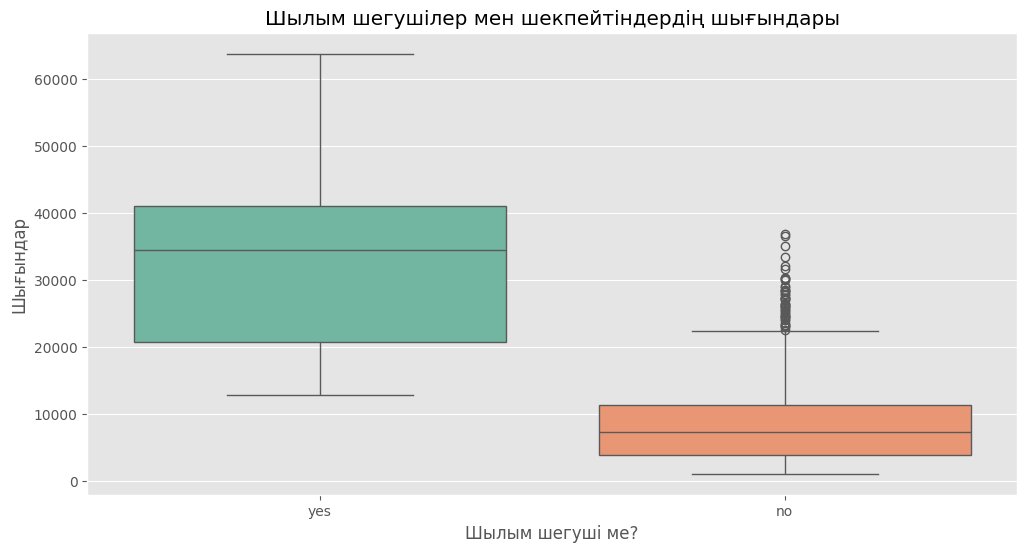

In [ ]:
plt.figure(figsize=(12, 6))
# Шылым шегу статусы бойынша шығындарды салыстыру
sns.boxplot(x='smoker', y='charges', data=df, palette='Set2')
plt.title('Шылым шегушілер мен шекпейтіндердің шығындары')
plt.xlabel('Шылым шегуші ме?')
plt.ylabel('Шығындар')
plt.show()

## 3-қадам: Деректерді алдын ала өңдеу (Preprocessing)

Машиналық оқыту модельдері мәтінді (string) түсінбейді, олар тек сандармен жұмыс істейді. Сондықтан біз:

1. **One-Hot Encoding:** `sex`, `smoker`, `region` сияқты категориялық деректерді 0 және 1-ге айналдырамыз.
2. **Splitting:** Деректерді "Үйрету" (Train) және "Тестілеу" (Test) жиынтықтарына бөлеміз.

In [ ]:
# Категориялық айнымалыларды One-Hot Encoding әдісімен түрлендіру
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print("Түрлендірілген деректердің алғашқы жолдары:")
display(df_encoded.head())

Түрлендірілген деректердің алғашқы жолдары:


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False



#### (Train-Test Split)

In [ ]:
# X (белгілер) және y (мақсатты айнымалы) бөліп алу
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Деректерді 80% (train) және 20% (test) етіп бөлу
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Үйрету жиынтығының өлшемі: {X_train.shape}")
print(f"Тестілеу жиынтығының өлшемі: {X_test.shape}")

Үйрету жиынтығының өлшемі: (1070, 8)
Тестілеу жиынтығының өлшемі: (268, 8)


### Масштабтау (Scaling)

`bmi` (дене салмағының индексі) және `age` (жас) айнымалыларының ауқымы әртүрлі. Градиенттік түсу әдісі дұрыс жұмыс істеуі үшін оларды бірдей масштабқа (StandardScaler) келтірген жөн.


In [ ]:
# Масштабтаушы объектіні құру
scaler = StandardScaler()

# Тек сандық бағаналарды масштабтау қажет (біздің жағдайда барлығы дерлік санға айналды, бірақ binary бағаналарды қалдырса да болады)
# Біз барлық кіріс деректерін масштабтаймыз
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Нәтижені тексеру (орташа мән ~0, ауытқу ~1 болуы керек)
print("Масштабталған деректердің орташа мәні:", X_train_scaled.mean(axis=0))

Масштабталған деректердің орташа мәні: [-1.99217589e-16 -4.64841042e-17 -2.32420521e-17 -6.30855700e-17
  2.98826384e-17 -4.64841042e-17 -3.32029316e-17  7.30464495e-17]


## 4-қадам: Модель құру (Linear Regression)

Алдымен ең қарапайым алгоритм – **Сызықтық Регрессиядан** бастаймыз. Бұл модель кіріс деректері мен шығыс деректері арасында түзу сызықты байланыс орнатуға тырысады.

In [ ]:
# Сызықтық регрессия моделін құру
lin_reg = LinearRegression()

# Модельді үйрету
lin_reg.fit(X_train_scaled, y_train)

# Тестілеу деректеріне болжам жасау
y_pred_lin = lin_reg.predict(X_test_scaled)

# Нәтижені салыстыру
comparison = pd.DataFrame({'Нақты мән': y_test, 'Болжам': y_pred_lin})
print(comparison.head())

        Нақты мән        Болжам
764    9095.06825   8969.550274
887    5272.17580   7068.747443
890   29330.98315  36858.410912
1293   9301.89355   9454.678501
259   33750.29180  26973.173457


### Модельді бағалау метрикалары

Регрессия сапасын тексеру үшін біз мыналарды қолданамыз:

* **MAE (Mean Absolute Error):** Орташа абсолюттік қателік.
* **MSE (Mean Squared Error):** Орташа квадраттық қателік (үлкен қателерді жазалайды).
* **R2 Score:** Детерминация коэффициенті (модель деректердің қанша пайызын түсіндіре алды).

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"--- {model_name} Нәтижелері ---")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.4f}")
    print("-" * 30)

evaluate_model(y_test, y_pred_lin, "Linear Regression")

--- Linear Regression Нәтижелері ---
MAE: 4181.19
RMSE: 5796.28
R2 Score: 0.7836
------------------------------


## 5-қадам: Күрделірек модель (Random Forest)

Сызықтық регрессия әрдайым күрделі байланыстарды таба алмайды. Енді **Random Forest Regressor** (Кездейсоқ орман) алгоритмін қолданып көрейік. Бұл алгоритм шешім қабылдау ағаштарының жиынтығынан тұрады.

In [ ]:
# Random Forest моделін құру (100 ағашпен)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Модельді үйрету
rf_model.fit(X_train_scaled, y_train)

# Болжам жасау
y_pred_rf = rf_model.predict(X_test_scaled)

# Бағалау
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Random Forest Нәтижелері ---
MAE: 2543.98
RMSE: 4567.78
R2 Score: 0.8656
------------------------------


### Нақты мән мен Болжамды визуализациялау

Екі модельдің нәтижесін графикте көрейік. Ең дұрысы нүктелер диагональ сызықтың бойында орналасуы керек.


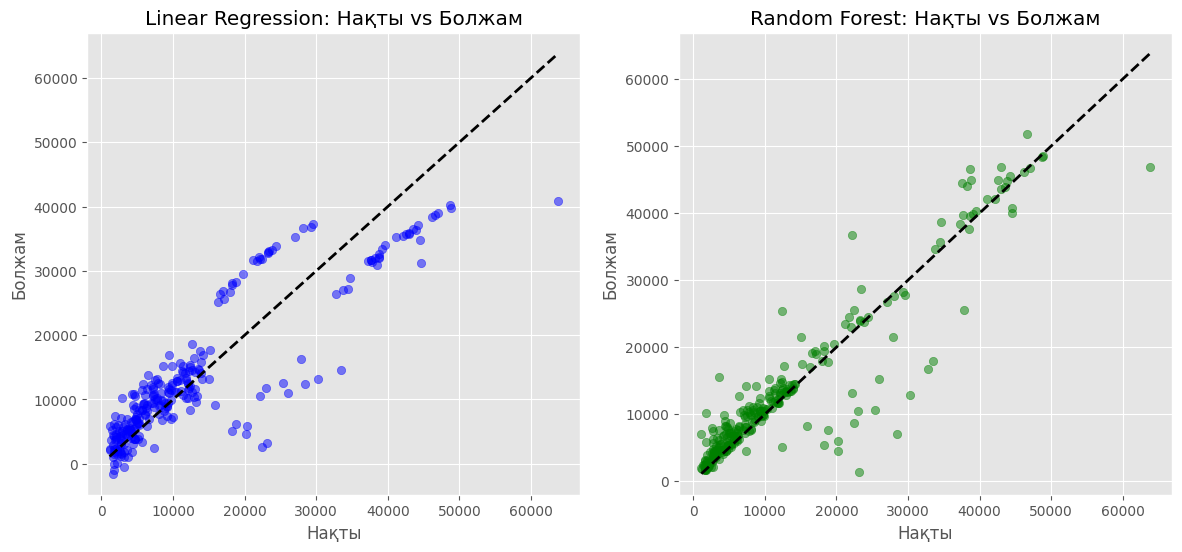

In [ ]:
plt.figure(figsize=(14, 6))

# Сызықтық регрессия графигі
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression: Нақты vs Болжам')
plt.xlabel('Нақты')
plt.ylabel('Болжам')

# Random Forest графигі
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest: Нақты vs Болжам')
plt.xlabel('Нақты')
plt.ylabel('Болжам')

plt.show()

## Студентке арналған қосымша тапсырма

Бұл ноутбукте біз толыққанды ML жобасын жасадық. Енді сіздің кезегіңіз:


1. **Жаңа фича қосу:** `bmi` көрсеткішіне қарап жаңа категориялық бағана қосыңыз (мысалы, BMI > 30 болса "Obese", әйтпесе "Normal") және модель сапасы өзгере ме, тексеріңіз.
2. **Cross-Validation:** Деректерді кездейсоқ бөлудің қателігін азайту үшін 5-fold cross-validation қолданыңыз.

Осы тапсырмаларды орындау арқылы сіз модель сапасын 85-87%-дан 90%-ға дейін көтере аласыз!

In [1]:

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------
# Деректі оқу (notebook-тағы URL)
# -------------------------
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

# -------------------------
# Бағалау функциясы (notebook стилінде)
# -------------------------
def evaluate(y_true, y_pred, title):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n--- {title} ---")
    print(f"MAE:  {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2:   {r2:.4f}")

# -------------------------
# Baseline: BMI категориясын қоспай
# -------------------------
target = "charges"
X_base = df.drop(columns=[target])
y = df[target]

cat_cols = ["sex", "smoker", "region"]          # бастапқы категориялық
num_cols = [c for c in X_base.columns if c not in cat_cols]

preprocess_base = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols),
    ],
    remainder="drop",
)

model = LinearRegression()

pipe_base = Pipeline([
    ("prep", preprocess_base),
    ("model", model),
])

X_train, X_test, y_train, y_test = train_test_split(
    X_base, y, test_size=0.2, random_state=42
)

pipe_base.fit(X_train, y_train)
pred_base = pipe_base.predict(X_test)
evaluate(y_test, pred_base, "Baseline (BMI категориясын қоспай)")

# -------------------------
# 1) Жаңа фича: BMI категориясы
# BMI > 30 => Obese, әйтпесе Normal
# -------------------------
df_feat = df.copy()
df_feat["bmi_category"] = np.where(df_feat["bmi"] > 30, "Obese", "Normal")

X_feat = df_feat.drop(columns=[target])
y_feat = df_feat[target]

cat_cols_feat = ["sex", "smoker", "region", "bmi_category"]
num_cols_feat = [c for c in X_feat.columns if c not in cat_cols_feat]

preprocess_feat = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_feat),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols_feat),
    ],
    remainder="drop",
)

pipe_feat = Pipeline([
    ("prep", preprocess_feat),
    ("model", LinearRegression()),
])

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_feat, y_feat, test_size=0.2, random_state=42
)

pipe_feat.fit(X_train2, y_train2)
pred_feat = pipe_feat.predict(X_test2)
evaluate(y_test2, pred_feat, "BMI категориясымен (bmi_category қосылды)")

print("\nR2 айырмасы (жаңа фича - baseline):", round(r2_score(y_test2, pred_feat) - r2_score(y_test, pred_base), 6))


# -------------------------
# 2) 5-fold Cross-Validation (random split қатесін азайту)
# Екі нұсқаны да салыстыру: baseline vs bmi_category
# -------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "r2": "r2",
    "neg_rmse": "neg_root_mean_squared_error",
    "neg_mae": "neg_mean_absolute_error",
}

cv_base = cross_validate(pipe_base, X_base, y, cv=kf, scoring=scoring, n_jobs=-1)
cv_feat = cross_validate(pipe_feat, X_feat, y_feat, cv=kf, scoring=scoring, n_jobs=-1)

def summarize_cv(cv_res, title):
    r2_mean = np.mean(cv_res["test_r2"])
    r2_std  = np.std(cv_res["test_r2"])
    rmse_mean = -np.mean(cv_res["test_neg_rmse"])
    rmse_std  = np.std(-cv_res["test_neg_rmse"])
    mae_mean = -np.mean(cv_res["test_neg_mae"])
    mae_std  = np.std(-cv_res["test_neg_mae"])
    print(f"\n--- 5-Fold CV: {title} ---")
    print(f"R2   mean±std:   {r2_mean:.4f} ± {r2_std:.4f}")
    print(f"RMSE mean±std:   {rmse_mean:.2f} ± {rmse_std:.2f}")
    print(f"MAE  mean±std:   {mae_mean:.2f} ± {mae_std:.2f}")

summarize_cv(cv_base, "Baseline")
summarize_cv(cv_feat, "BMI категориясымен")

print("\nCV R2 айырмасы (BMI категориясы - baseline):",
      round(np.mean(cv_feat["test_r2"]) - np.mean(cv_base["test_r2"]), 6))


--- Baseline (BMI категориясын қоспай) ---
MAE:  4181.19
RMSE: 5796.28
R2:   0.7836

--- BMI категориясымен (bmi_category қосылды) ---
MAE:  4266.72
RMSE: 5785.90
R2:   0.7844

R2 айырмасы (жаңа фича - baseline): 0.000775

--- 5-Fold CV: Baseline ---
R2   mean±std:   0.7402 ± 0.0578
RMSE mean±std:   6077.23 ± 256.90
MAE  mean±std:   4203.41 ± 129.06

--- 5-Fold CV: BMI категориясымен ---
R2   mean±std:   0.7454 ± 0.0547
RMSE mean±std:   6018.89 ± 256.79
MAE  mean±std:   4264.01 ± 135.28

CV R2 айырмасы (BMI категориясы - baseline): 0.0052
